In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

3. (a) Use scikit learn to fit a gradient boosting model to dset0 (You should model the first column in `dset0.csv` given the other columns). Fit models with 1, 10, 100, 300, and 1000 trees. What do you observe about the generalization behaviour of these models?

In [2]:
# load and see data 
fname0 = os.path.join('data', 'dset0.csv')
dset0 = pd.read_csv(fname0, sep=',', header=None)
dset0

,0,1,2,3,4,5
0,1.0,1.332,4.439,-0.487,-0.873,7.0
1,1.0,0.715,4.382,-2.142,3.567,-10.0
2,0.0,-1.545,3.921,-2.139,1.540,-2.0
3,0.0,-0.008,2.427,-0.824,0.552,7.0
4,1.0,0.621,4.275,-0.816,-0.620,-4.0
...,...,...,...,...,...,...
495,0.0,0.488,1.986,-1.197,-3.191,0.0
496,0.0,0.056,2.668,-2.302,-4.224,0.0
497,0.0,0.546,4.441,-2.558,-1.637,8.0
498,1.0,-0.683,2.610,-3.230,-0.708,-1.0


In [3]:
y0 = dset0.iloc[:, 0]
X0 = dset0.iloc[:, 1:]
print(y0.shape)
print(X0.shape)

(500,)
(500, 5)


In [121]:
from sklearn.model_selection import train_test_split
X0_train, X0_test, y0_train, y0_test = train_test_split(
    X0, y0, test_size=0.20)
print(f'x_train: {X0_train.shape}\t y_train: {y0_train.shape}\t frac: {y0_train.shape[0]/y0.shape[0]*100:.2f}%')
print(f'x_test: {X0_test.shape}\t y_test: {y0_test.shape}\t\t frac: {y0_test.shape[0]/y0.shape[0]*100:.2f}%')

x_train: (400, 5)	 y_train: (400,)	 frac: 80.00%
x_test: (100, 5)	 y_test: (100,)		 frac: 20.00%


In [122]:
from sklearn.ensemble import GradientBoostingClassifier
n_trees = [1, 10, 100, 300, 1000]
train_accuracy_0 = np.zeros(len(n_trees))
test_accuracy_0 = np.zeros(len(n_trees))

for i, n_t in enumerate(n_trees):
    model = GradientBoostingClassifier(
        loss='exponential',
        n_estimators = n_t,
        random_state = 0
    ).fit(X0_train, y0_train)
    train_accuracy_0[i] = model.score(X0_train, y0_train)
    test_accuracy_0[i] = model.score(X0_test, y0_test)

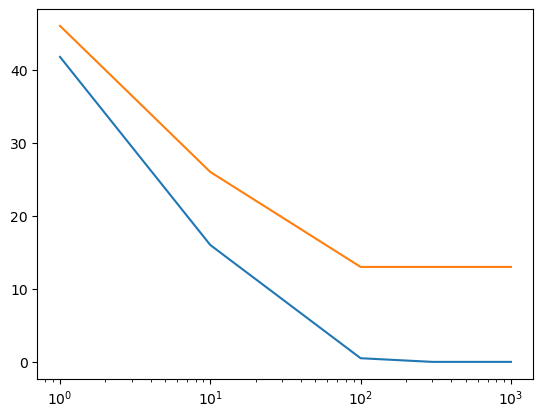

In [123]:
plt.plot(n_trees, (1-train_accuracy_0)*100)
plt.plot(n_trees, (1-test_accuracy_0)*100)
plt.xscale('log')

3. (b) Use scikit learn to fit a gradient boosting model to dset1 (You should model the first column in `dset1.csv` given the other columns). Fit models with 1, 10, 100, 300, and 1000 trees. What do you observe about the generalization behaviour of these models?

In [31]:
# load and see data 
fname1 = os.path.join('data', 'dset1.csv')
dset1 = pd.read_csv(fname1, sep=',', header=None)
dset1

,0,1,2,3,4,5
0,0.0,1.558,4.151,-2.741,-0.368,-4.0
1,1.0,-2.179,5.395,-2.018,-4.662,8.0
2,0.0,0.841,3.552,-1.664,3.957,-9.0
3,0.0,0.438,2.388,-0.383,-2.309,3.0
4,1.0,-0.457,2.534,-1.893,-0.634,4.0
...,...,...,...,...,...,...
495,1.0,-0.439,2.472,-1.614,-3.059,-7.0
496,0.0,0.073,2.527,-3.146,-1.365,4.0
497,0.0,0.253,3.967,-3.624,-0.831,1.0
498,1.0,0.192,2.336,-1.860,-4.202,-3.0


In [66]:
y1 = dset1.iloc[:, 0]
X1 = dset1.iloc[:, 1:]
print(y1.shape)
print(X1.shape)

(500,)
(500, 5)


In [82]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.20)
print(f'x_train: {X1_train.shape}\t y_train: {y1_train.shape}\t frac: {y1_train.shape[0]/y1.shape[0]*100:.2f}%')
print(f'x_test: {X1_test.shape}\t y_test: {y1_test.shape}\t\t frac: {y1_test.shape[0]/y1.shape[0]*100:.2f}%')

x_train: (400, 5)	 y_train: (400,)	 frac: 80.00%
x_test: (100, 5)	 y_test: (100,)		 frac: 20.00%


In [83]:
train_accuracy_1 = np.zeros(len(n_trees))
test_accuracy_1 = np.zeros(len(n_trees))

for i, n_t in enumerate(n_trees):
    model = GradientBoostingClassifier(
        loss='exponential',
        n_estimators = n_t,
        random_state = 0
    ).fit(X1_train, y1_train)
    train_accuracy_1[i] = model.score(X1_train, y1_train)
    test_accuracy_1[i] = model.score(X1_test, y1_test)

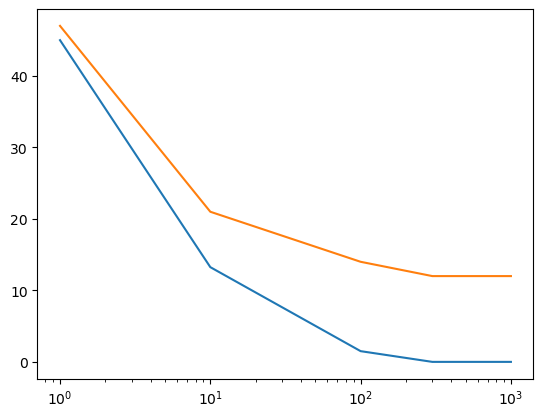

In [84]:
plt.plot(n_trees, (1-train_accuracy_1)*100)
plt.plot(n_trees, (1-test_accuracy_1)*100)
plt.xscale('log')